
## Meausure elongation kinetics of VK8 insert mRNAs

### Goal

- Tested VK8|QS8 and SF8|FQ8 sample pairs. See Exp113 for experimental details. Testing three IVT replicates for each of these inserts.

- In addition, I have two controls in this experiment:

  1. A no-insert H2B-Nluc construct. This should give me a baseline for how quickly Nluc is translated without any 8x dipeptide sequence. 
  2. A 3xTTA stalling control. TTA leucine should be difficult for RRL to translate, and is known to stall ribosomes in this system. The 3xTTA motif is directly before the start of Nluc. It's in a QS8 base construct (H2B-QS8-3xTTA-Nluc). 


### Load libraries

In [1]:
library(tidyverse)
library(plotrix)
library(rasilabRtemplates)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### Read in data and annotations

- Note that the kinetic interval times got thrown off slightly. The machine was not quite able to keep up with a 0.5s integration time for 13 wells, over 10 seconds. However, kinetic intervral between each cycle was still ~10s for each cycle. 

In [2]:
rawcounts <- read_csv("../data/vk8_rrl_data.csv") %>% 
  print()

annotations <- read_csv("../data/vk8_sample_annotations.csv") %>% 
  print()

Rows: 150 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (19): cycle, time, temp, A3, A5, C3, C5, E3, E5, G3, G5, I3, I5, K3, K5,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 150 × 19
   cycle  time  temp    A3    A5    C3    C5    E3    E5    G3    G5    I3    I5
   <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1     1     0  30.1     6     6    -5    -1     2     2    -5    -9     6     2
 2     2    10  29.9    -1    -5     6    -5     2     6    -5    -1    10    -5
 3     3    20  29.8    -5    -1    -1    -1    -5     2     2    -5    -9    14
 4     4    30  29.9    -5    10    -9     6    10     6    -1     6    -9    -1
 5     5    40  29.9     6    -5    -1    -5     2     2    -1     6    -9    -5
 6     6    50  30.1     6    -9    -1    -5    -1    -5    14     2    -5     6
 7     7    60  30.3    10    -1     6    -1     6    -5    -5    -1    -5    26
 8     8    70  30.5    -1    -1    -1    -1    -5     2    -1    -1    -5     2
 9     9    80  30.3     2    -1    -9     6    10     2     2    10    -5    -5
10    10    90  30.2    -1    -1     2     6     6     6    -5    -1    -1    -1
# … wit

Rows: 16 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): well, id, test_dipeptide, dipeptide, reading_frame
dbl (1): replicate

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 16 × 6
   well  id     test_dipeptide dipeptide replicate reading_frame
   <chr> <chr>  <chr>          <chr>         <dbl> <chr>        
 1 A3    113m3  VK             VK                1 in_frame     
 2 C3    113m4  VK             QS                1 frameshift   
 3 E3    113m7  SF             SF                1 in_frame     
 4 G3    113m8  SF             FQ                1 frameshift   
 5 I3    113m9  VK             VK                2 in_frame     
 6 K3    113m10 VK             QS                2 frameshift   
 7 M3    113m11 SF             SF                2 in_frame     
 8 O3    113m12 SF             FQ                2 frameshift   
 9 A5    113m13 VK             VK                3 in_frame     
10 C5    113m14 VK             QS                3 frameshift   
11 E5    113m15 SF             SF                3 in_frame     
12 G5    113m16 SF             FQ                3 frameshift   
13 I5    113m17 None           None              1 in_frame     
14 K5 

### Join annotations to data


In [3]:
join_data <- rawcounts %>% 
  select(-temp, -cycle) %>% 
  pivot_longer(!time, names_to = "well", values_to = "count") %>% 
  left_join(annotations, by = "well") %>% 
  mutate(replicate = as.factor(replicate)) %>% 
  print()

join_data 

# A tibble: 2,400 × 8
    time well  count id     test_dipeptide dipeptide replicate reading_frame
   <dbl> <chr> <dbl> <chr>  <chr>          <chr>     <fct>     <chr>        
 1     0 A3        6 113m3  VK             VK        1         in_frame     
 2     0 A5        6 113m13 VK             VK        3         in_frame     
 3     0 C3       -5 113m4  VK             QS        1         frameshift   
 4     0 C5       -1 113m14 VK             QS        3         frameshift   
 5     0 E3        2 113m7  SF             SF        1         in_frame     
 6     0 E5        2 113m15 SF             SF        3         in_frame     
 7     0 G3       -5 113m8  SF             FQ        1         frameshift   
 8     0 G5       -9 113m16 SF             FQ        3         frameshift   
 9     0 I3        6 113m9  VK             VK        2         in_frame     
10     0 I5        2 113m17 None           None      1         in_frame     
# … with 2,390 more rows


time,well,count,id,test_dipeptide,dipeptide,replicate,reading_frame
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<fct>,<chr>
0,A3,6,113m3,VK,VK,1,in_frame
0,A5,6,113m13,VK,VK,3,in_frame
0,C3,-5,113m4,VK,QS,1,frameshift
0,C5,-1,113m14,VK,QS,3,frameshift
0,E3,2,113m7,SF,SF,1,in_frame
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1490,K5,220386,113m18,3xTTA,3xTTA,1,in_frame
1490,M3,223745,113m11,SF,SF,2,in_frame
1490,M5,24368,113m19,None,None,2,in_frame


### Plot of luminescence values over time

- Plotting all samples together. Data looks really clean! Replicates strongly aggree with one another.

- Note that there are only two replicates of my No-insert and 3xTTA controls. No-insert control shows fast translation as expected, and 3xTTA control shows slowed elongation, as expected from a strong stall.  

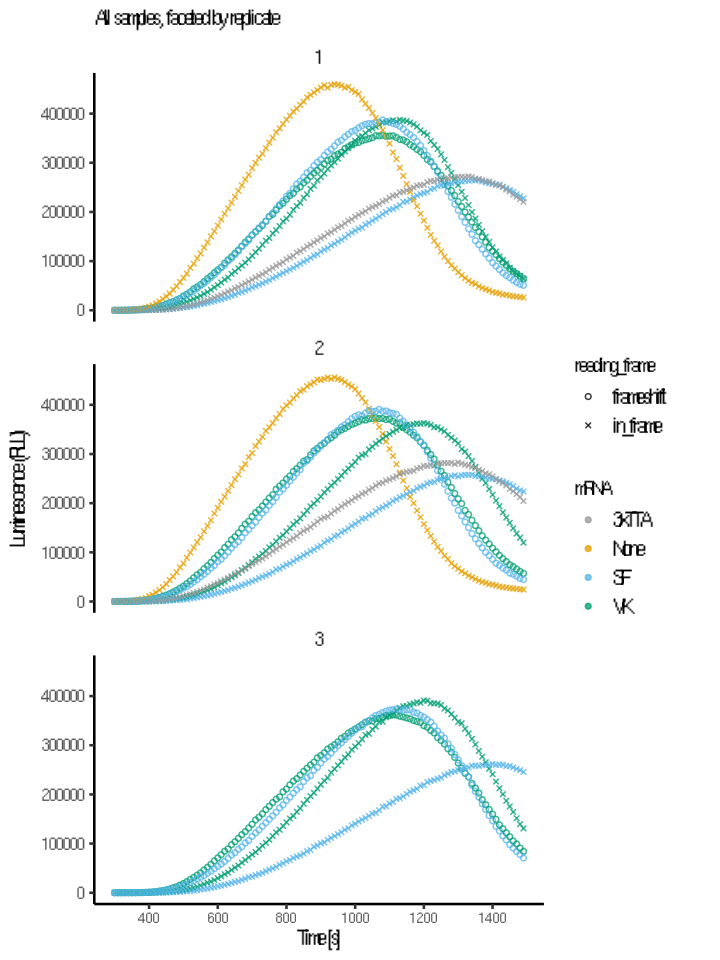

In [9]:

options(repr.plot.width=6, repr.plot.height=8) 

join_data %>% 
  # remove negative control wells
  filter(!is.na(dipeptide)) %>%
  # Select only the second VK8|QS8 replicate for plotting
  # filter(!str_detect(id, "m1|m2")) %>% 
  # Trim values before translation starts and after substrate starts to burn out
  filter(time >=300 & time <=1500) %>% 
  ggplot(aes(x = time, y = count, color = test_dipeptide, shape = reading_frame)) +
    geom_point(size = 1, alpha = 0.75) +
    # scale_colour_manual(values = c("#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"))+
    scale_shape_manual(values = c(1, 4))+
    facet_wrap(~replicate, nrow = 3)+ 
    labs(x = "Time [s]", y = "Luminescence (RLU)", color = "mRNA", linetype = "Dipeptide", title = "All samples, faceted by replicate") +
    theme(plot.title = element_text(size = 12),
          legend.title = element_text(size = 11),
          axis.text.x = element_text(angle = 0, size = 8),
          strip.text.x = element_text(size = 11)) +
#    scale_y_log10()+
    scale_y_continuous(breaks = scales::pretty_breaks(n=4), 
                       labels = function(x) format(x, scientific = FALSE))+ 
    scale_x_continuous(breaks = scales::pretty_breaks(n=5))

### Calculate mean RLU and standard error

- Select appropriate linear time range for VK8 sample.

In [10]:
plot_data <- join_data %>% print %>% 
  # Caluclate mean values for a given time, with standard error
  group_by(time, dipeptide) %>% 
  mutate(count = count / 1e5) %>% 
  mutate(mean_nluc = mean(count), se_nluc = plotrix::std.error(count)) %>% 
  ungroup() %>% 
 #  Select only time from when expressions starts to where signal peaks
  filter(time >=350 & time <=1050) %>% 
  print()

# A tibble: 2,400 × 8
    time well  count id     test_dipeptide dipeptide replicate reading_frame
   <dbl> <chr> <dbl> <chr>  <chr>          <chr>     <fct>     <chr>        
 1     0 A3        6 113m3  VK             VK        1         in_frame     
 2     0 A5        6 113m13 VK             VK        3         in_frame     
 3     0 C3       -5 113m4  VK             QS        1         frameshift   
 4     0 C5       -1 113m14 VK             QS        3         frameshift   
 5     0 E3        2 113m7  SF             SF        1         in_frame     
 6     0 E5        2 113m15 SF             SF        3         in_frame     
 7     0 G3       -5 113m8  SF             FQ        1         frameshift   
 8     0 G5       -9 113m16 SF             FQ        3         frameshift   
 9     0 I3        6 113m9  VK             VK        2         in_frame     
10     0 I5        2 113m17 None           None      1         in_frame     
# … with 2,390 more rows
# A tibble: 1,136 × 10
    ti


### Plot of VK8 luminescence values over time

# A tibble: 426 × 10
    time well    count id     test_dip…¹ dipep…² repli…³ readi…⁴ mean_…⁵ se_nluc
   <dbl> <chr>   <dbl> <chr>  <chr>      <chr>   <fct>   <chr>     <dbl>   <dbl>
 1   350 A3    0.00182 113m3  VK         VK      1       in_fra… 7.53e-4 5.35e-4
 2   350 A5    0.00014 113m13 VK         VK      3       in_fra… 7.53e-4 5.35e-4
 3   350 C3    0.00562 113m4  VK         QS      1       frames… 3.85e-3 1.77e-3
 4   350 C5    0.0003  113m14 VK         QS      3       frames… 3.85e-3 1.77e-3
 5   350 I3    0.0003  113m9  VK         VK      2       in_fra… 7.53e-4 5.35e-4
 6   350 K3    0.00562 113m10 VK         QS      2       frames… 3.85e-3 1.77e-3
 7   360 A3    0.00298 113m3  VK         VK      1       in_fra… 1.31e-3 8.51e-4
 8   360 A5    0.00018 113m13 VK         VK      3       in_fra… 1.31e-3 8.51e-4
 9   360 C3    0.00906 113m4  VK         QS      1       frames… 6.11e-3 2.63e-3
10   360 C5    0.00086 113m14 VK         QS      3       frames… 6.11e-3 2.63e-3
# … wit

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


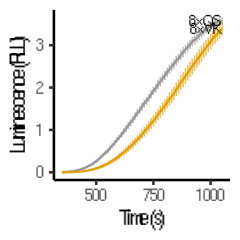

In [13]:
options(repr.plot.width=2, repr.plot.height=2) 

label_data <- plot_data %>% 
  filter(str_detect(test_dipeptide, "VK")) %>% print %>% 
  mutate(dipeptide = paste0("8×", dipeptide)) %>% 
  group_by(dipeptide) %>% 
  arrange(-time) %>% 
  slice(1) %>% 
  ungroup() 
  
plot_data %>%
  filter(str_detect(test_dipeptide, "VK")) %>% print %>% 
  ggplot(aes(x = time, y = mean_nluc, color = dipeptide, ymax = mean_nluc + se_nluc, ymin = mean_nluc - se_nluc,
             label = dipeptide, group = dipeptide)) + 
  geom_line() +
  geom_errorbar(width = 0, size = 0.3, alpha=0.3) +
  # Make labels for the individual inserts
  geom_text(data = label_data, size=3, color = "black", hjust=1)+
  # Show labels even though they're off grid
  coord_cartesian(clip = "off")+
  scale_colour_manual(values = cbPalette)+
  labs(x = "Time (s)", y = "Luminescence (RLU)") +
  #theme(axis.text = element_text(size = 6))+
  scale_y_continuous(breaks = scales::pretty_breaks(n=4))+
  scale_x_continuous(breaks=c(500,750, 1000))+
  guides(color = F)+
  NULL

ggsave("../figures/vk_elongation_kinetics.pdf", width = 1.5, height = 1.5) 


## Calculate transit time

# A tibble: 114 × 9
    time well   count id    test_dipeptide dipeptide replicate reading…¹ fit_p…²
   <dbl> <chr>  <dbl> <chr> <chr>          <chr>     <fct>     <chr>     <lgl>  
 1   610 C3     87519 113m4 VK             QS        1         frameshi… TRUE   
 2   620 C3     95765 113m4 VK             QS        1         frameshi… TRUE   
 3   630 C3    102482 113m4 VK             QS        1         frameshi… TRUE   
 4   640 C3    108764 113m4 VK             QS        1         frameshi… TRUE   
 5   650 C3    115786 113m4 VK             QS        1         frameshi… TRUE   
 6   660 C3    122527 113m4 VK             QS        1         frameshi… TRUE   
 7   670 C3    130402 113m4 VK             QS        1         frameshi… TRUE   
 8   680 C3    138397 113m4 VK             QS        1         frameshi… TRUE   
 9   690 C3    145016 113m4 VK             QS        1         frameshi… TRUE   
10   700 C3    153084 113m4 VK             QS        1         frameshi… TRUE   
# … with

dipeptide,mean_time,se_time
<fct>,<dbl>,<dbl>
8×QS,491.3600,6.636165
8×VK,594.4517,11.772613


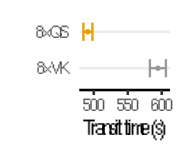

In [20]:
options(repr.plot.width=1.5, repr.plot.height=1.25) 


plot_data <- join_data %>% 
  mutate(fit_points = case_when(
    dipeptide %in% c("VK") & time > 750 & time < 950 ~ T,
    dipeptide %in% c("QS") & time > 600 & time < 800 ~ T,
    T ~ F
  )) %>% 
  filter(fit_points) %>% 
  arrange(replicate, dipeptide) %>% print %>% 
  group_by(dipeptide, replicate) %>% 
  nest() %>%
  mutate(fit = map(data, function(df) lm(formula = time ~ count, data=df))) %>%
  mutate(fit = map(fit, broom::tidy)) %>%
  unnest(fit) %>% 
  ungroup() %>% 
  select(dipeptide, replicate, term, estimate) %>% 
  pivot_wider(names_from = "term", values_from = "estimate") %>%
  janitor::clean_names() %>% 
  arrange(dipeptide) %>% 
  group_by(dipeptide) %>%
  summarize(mean_time = mean(intercept), se_time = plotrix::std.error(intercept)) %>%
  ungroup() %>%
  mutate(dipeptide = fct_rev(as.factor(paste0("8×", dipeptide))))

plot_data


plot_data %>% 
  ggplot(aes(y = dipeptide, x = mean_time,  color = dipeptide,
             xmin = mean_time - se_time, xmax = mean_time + se_time)) +
  geom_point(size = 0.5) +
  geom_errorbar(width=0.5) +
  scale_x_continuous(breaks = c(500, 550, 600)) +
  scale_color_manual(values = cbPalette) +
  labs(x = "Transit time (s)", y = "") +
  theme(axis.ticks.y = element_blank(), 
        panel.grid.major.y = element_line(),
        axis.line.y = element_blank(),
        legend.position = "none") +
  NULL

ggsave("../figures/vk_transit_time.pdf", width = 1.25, height = 1) 
